# Temperature Forecast Project using ML

# Step 1: Data Exploration and Preprocessing

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset
df = pd.read_csv("temperature.csv")
df


,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,30-08-2017,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


In [3]:
# Handling missing values
df.fillna(df.mean(), inplace=True)

# Converting 'Date' to datetime type
df['Date'] = pd.to_datetime(df['Date'])

# Feature Scaling (Min-Max Scaling)
numerical_features = ['LDAPS_RHmin', 'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
                      'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4']
df[numerical_features] = (df[numerical_features] - df[numerical_features].min()) / (df[numerical_features].max() - df[numerical_features].min())


# Displaying the updated dataframe
print(df.head())

   station       Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0 2013-06-30          28.7          21.4     0.488518     0.783659   
1      2.0 2013-06-30          31.9          21.6     0.412406     0.771200   
2      3.0 2013-06-30          31.6          23.3     0.367024     0.609716   
3      4.0 2013-06-30          32.0          23.4     0.488316     0.914366   
4      5.0 2013-06-30          31.4          21.9     0.462078     0.760251   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS  LDAPS_LH  ...  LDAPS_PPT2  \
0          0.499546          0.569132  0.207447  0.365853  ...         0.0   
1          0.584480          0.636121  0.148053  0.288703  ...         0.0   
2          0.595982          0.670697  0.171575  0.150545  ...         0.0   
3          0.577497          0.589934  0.145848  0.349446  ...         0.0   
4          0.549257          0.600379  0.150325  0.535505  ...         0.0   

   LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM   

C:\Users\ACHINTYA\AppData\Local\Temp\ipykernel_9348\174709499.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.mean(), inplace=True)
C:\Users\ACHINTYA\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '30-06-2013' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\ACHINTYA\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '13-07-2013' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\ACHINTYA\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '14-07-2013

In [4]:
# Dropping rows with missing values in the 'station' and 'Date' columns
df.dropna(subset=['station', 'Date'], inplace=True)

# Encoding categorical feature 'station'
df = pd.get_dummies(df, columns=['station'], drop_first=True)

# Feature Engineering

# Extracting additional date-related features
df['Day_of_Year'] = df['Date'].dt.dayofyear
df['Weekday'] = df['Date'].dt.weekday
df['Is_Weekend'] = df['Weekday'].isin([5, 6]).astype(int)

# Dropping the original 'Date' column as we've extracted relevant information
df.drop('Date', axis=1, inplace=True)

# Displaying the updated dataframe
print("\nUpdated DataFrame after Data Cleaning and Feature Engineering:")
print(df.head())



Updated DataFrame after Data Cleaning and Feature Engineering:
   Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  LDAPS_Tmax_lapse  \
0          28.7          21.4     0.488518     0.783659          0.499546   
1          31.9          21.6     0.412406     0.771200          0.584480   
2          31.6          23.3     0.367024     0.609716          0.595982   
3          32.0          23.4     0.488316     0.914366          0.577497   
4          31.4          21.9     0.462078     0.760251          0.549257   

   LDAPS_Tmin_lapse  LDAPS_WS  LDAPS_LH  LDAPS_CC1  LDAPS_CC2  ...  \
0          0.569132  0.207447  0.365853   0.241862   0.210559  ...   
1          0.636121  0.148053  0.288703   0.233137   0.260000  ...   
2          0.670697  0.171575  0.150545   0.216426   0.265884  ...   
3          0.589934  0.145848  0.349446   0.223692   0.233388  ...   
4          0.600379  0.150325  0.535505   0.156529   0.258165  ...   

   station_19.0  station_20.0  station_21.0  station

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7750 entries, 0 to 7749
Data columns (total 50 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Present_Tmax      7750 non-null   float64
 1   Present_Tmin      7750 non-null   float64
 2   LDAPS_RHmin       7750 non-null   float64
 3   LDAPS_RHmax       7750 non-null   float64
 4   LDAPS_Tmax_lapse  7750 non-null   float64
 5   LDAPS_Tmin_lapse  7750 non-null   float64
 6   LDAPS_WS          7750 non-null   float64
 7   LDAPS_LH          7750 non-null   float64
 8   LDAPS_CC1         7750 non-null   float64
 9   LDAPS_CC2         7750 non-null   float64
 10  LDAPS_CC3         7750 non-null   float64
 11  LDAPS_CC4         7750 non-null   float64
 12  LDAPS_PPT1        7750 non-null   float64
 13  LDAPS_PPT2        7750 non-null   float64
 14  LDAPS_PPT3        7750 non-null   float64
 15  LDAPS_PPT4        7750 non-null   float64
 16  lat               7750 non-null   float64


# Step 2: Data Splitting

In [6]:
from sklearn.model_selection import train_test_split

# Identifying the features (X) and target variables (y)
# For example, let's use all columns except 'Next_Tmax' and 'Next_Tmin' as features, and 'Next_Tmax' as the target for Max Temperature prediction
X = df.drop(['Next_Tmax', 'Next_Tmin'], axis=1)
y_max_temp = df['Next_Tmax']

# Splitting the data into training and testing sets for Max Temperature prediction
X_train_max_temp, X_test_max_temp, y_train_max_temp, y_test_max_temp = train_test_split(X, y_max_temp, test_size=0.2, random_state=42)

# For Min Temperature prediction
y_min_temp = df['Next_Tmin']

# Splitting the data into training and testing sets for Min Temperature prediction
X_train_min_temp, X_test_min_temp, y_train_min_temp, y_test_min_temp = train_test_split(X, y_min_temp, test_size=0.2, random_state=42)

# Displaying the shape of the training and testing sets
print("Shapes of Training and Testing Sets for Max Temperature Prediction:")
print("X_train_max_temp:", X_train_max_temp.shape)
print("X_test_max_temp:", X_test_max_temp.shape)
print("y_train_max_temp:", y_train_max_temp.shape)
print("y_test_max_temp:", y_test_max_temp.shape)

print("\nShapes of Training and Testing Sets for Min Temperature Prediction:")
print("X_train_min_temp:", X_train_min_temp.shape)
print("X_test_min_temp:", X_test_min_temp.shape)
print("y_train_min_temp:", y_train_min_temp.shape)
print("y_test_min_temp:", y_test_min_temp.shape)


Shapes of Training and Testing Sets for Max Temperature Prediction:
X_train_max_temp: (6200, 48)
X_test_max_temp: (1550, 48)
y_train_max_temp: (6200,)
y_test_max_temp: (1550,)

Shapes of Training and Testing Sets for Min Temperature Prediction:
X_train_min_temp: (6200, 48)
X_test_min_temp: (1550, 48)
y_train_min_temp: (6200,)
y_test_min_temp: (1550,)


# Step 3: Model Building and Training for Minimum Temperature Prediction

In [7]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

# Model Building and Training for Minimum Temperature Prediction

# Creating a Random Forest Regressor
rf_model_min_temp = RandomForestRegressor(random_state=42)

# Training the model on the training set
rf_model_min_temp.fit(X_train_min_temp, y_train_min_temp)

# Evaluating the Model

# Making predictions on the testing set
y_pred_min_temp = rf_model_min_temp.predict(X_test_min_temp)

# Calculating evaluation metrics
mae_min_temp = mean_absolute_error(y_test_min_temp, y_pred_min_temp)
mse_min_temp = mean_squared_error(y_test_min_temp, y_pred_min_temp)
rmse_min_temp = np.sqrt(mse_min_temp)

print("Mean Absolute Error (MAE) for Min Temperature Prediction:", mae_min_temp)
print("Mean Squared Error (MSE) for Min Temperature Prediction:", mse_min_temp)
print("Root Mean Squared Error (RMSE) for Min Temperature Prediction:", rmse_min_temp)



Mean Absolute Error (MAE) for Min Temperature Prediction: 0.5591261892055536
Mean Squared Error (MSE) for Min Temperature Prediction: 0.541226395093249
Root Mean Squared Error (RMSE) for Min Temperature Prediction: 0.7356809057555109


In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

# Linear Regression for Min Temperature Prediction

# Creating a Linear Regression model
linear_model_min_temp = LinearRegression()

# Training the model on the training set
linear_model_min_temp.fit(X_train_min_temp, y_train_min_temp)

# Making predictions on the testing set
y_pred_linear_min_temp = linear_model_min_temp.predict(X_test_min_temp)

# Calculating evaluation metrics for Linear Regression
mae_linear_min_temp = mean_absolute_error(y_test_min_temp, y_pred_linear_min_temp)
mse_linear_min_temp = mean_squared_error(y_test_min_temp, y_pred_linear_min_temp)
rmse_linear_min_temp = np.sqrt(mse_linear_min_temp)

print("\nLinear Regression Metrics for Min Temperature Prediction:")
print("Mean Absolute Error (MAE):", mae_linear_min_temp)
print("Mean Squared Error (MSE):", mse_linear_min_temp)
print("Root Mean Squared Error (RMSE):", rmse_linear_min_temp)

# Decision Tree Regression for Min Temperature Prediction

# Creating a Decision Tree Regressor model
dt_model_min_temp = DecisionTreeRegressor(random_state=42)

# Training the model on the training set
dt_model_min_temp.fit(X_train_min_temp, y_train_min_temp)

# Making predictions on the testing set
y_pred_dt_min_temp = dt_model_min_temp.predict(X_test_min_temp)

# Calculating evaluation metrics for Decision Tree Regression
mae_dt_min_temp = mean_absolute_error(y_test_min_temp, y_pred_dt_min_temp)
mse_dt_min_temp = mean_squared_error(y_test_min_temp, y_pred_dt_min_temp)
rmse_dt_min_temp = np.sqrt(mse_dt_min_temp)

print("\nDecision Tree Regression Metrics for Min Temperature Prediction:")
print("Mean Absolute Error (MAE):", mae_dt_min_temp)
print("Mean Squared Error (MSE):", mse_dt_min_temp)
print("Root Mean Squared Error (RMSE):", rmse_dt_min_temp)



Linear Regression Metrics for Min Temperature Prediction:
Mean Absolute Error (MAE): 0.7009688879419745
Mean Squared Error (MSE): 0.8270194231923373
Root Mean Squared Error (RMSE): 0.9094060826673293

Decision Tree Regression Metrics for Min Temperature Prediction:
Mean Absolute Error (MAE): 0.8159813675749035
Mean Squared Error (MSE): 1.2181835018888065
Root Mean Squared Error (RMSE): 1.1037135053485603


In [9]:
# Defining tolerance for accuracy calculation
tolerance = 1.0

# Calculating accuracy percentage for Random Forest Regression
accuracy_rf = np.mean(np.abs(y_test_min_temp - y_pred_min_temp) <= tolerance) * 100
print(f"Accuracy Percentage (Random Forest Regression): {accuracy_rf:.2f}%")

# Calculating accuracy percentage for Linear Regression
accuracy_linear = np.mean(np.abs(y_test_min_temp - y_pred_linear_min_temp) <= tolerance) * 100
print(f"Accuracy Percentage (Linear Regression): {accuracy_linear:.2f}%")

# Calculating accuracy percentage for Decision Tree Regression
accuracy_dt = np.mean(np.abs(y_test_min_temp - y_pred_dt_min_temp) <= tolerance) * 100
print(f"Accuracy Percentage (Decision Tree Regression): {accuracy_dt:.2f}%")


Accuracy Percentage (Random Forest Regression): 85.03%
Accuracy Percentage (Linear Regression): 76.52%
Accuracy Percentage (Decision Tree Regression): 71.16%


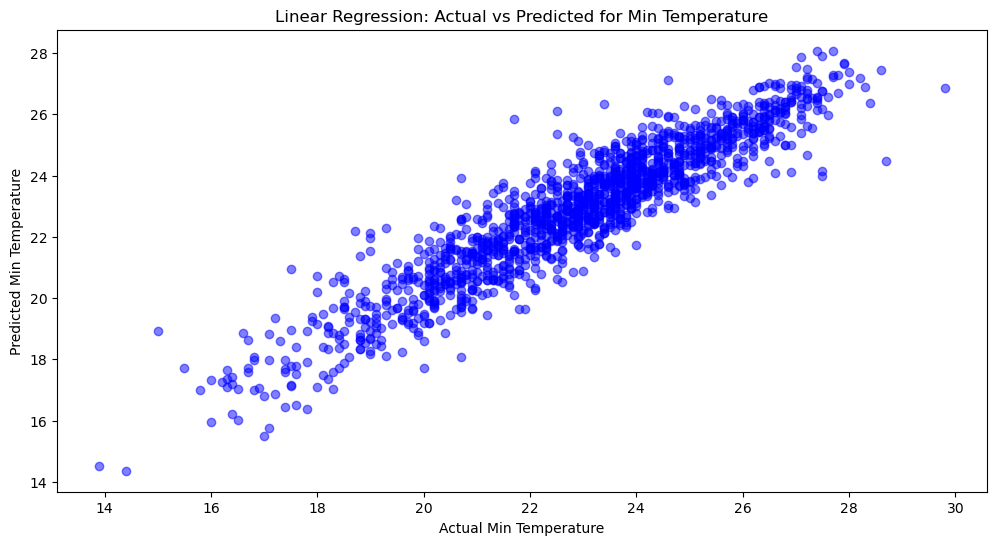

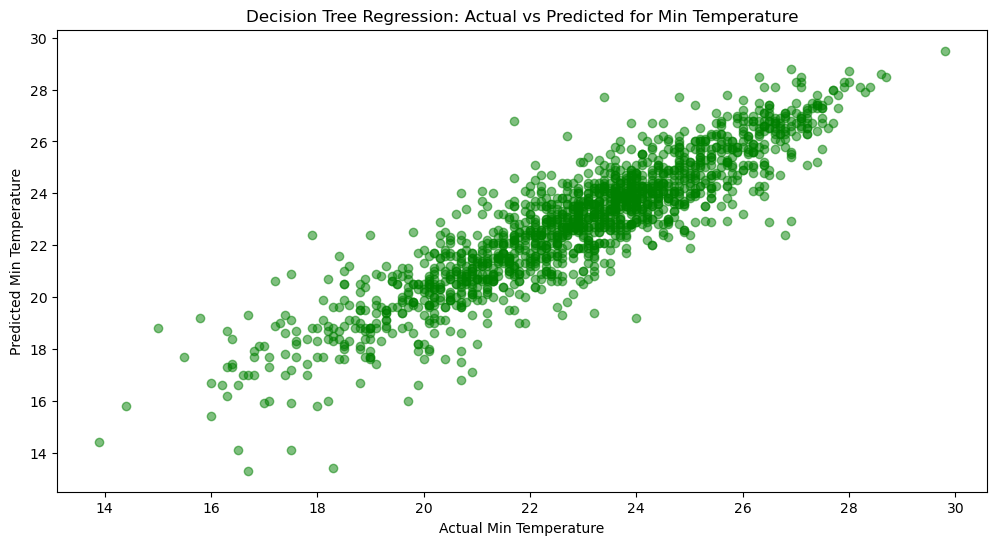

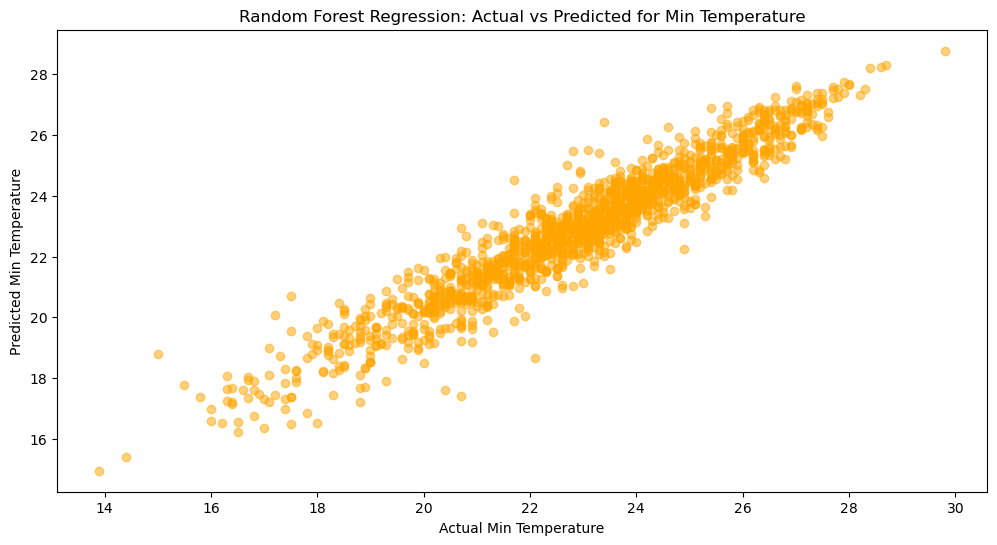

In [10]:
# Plotting Actual vs Predicted values for Min Temperature Prediction

# Plotting for Linear Regression
plt.figure(figsize=(12, 6))
plt.scatter(y_test_min_temp, y_pred_linear_min_temp, color='blue', alpha=0.5)
plt.title("Linear Regression: Actual vs Predicted for Min Temperature")
plt.xlabel("Actual Min Temperature")
plt.ylabel("Predicted Min Temperature")
plt.show()

# Plotting for Decision Tree Regression
plt.figure(figsize=(12, 6))
plt.scatter(y_test_min_temp, y_pred_dt_min_temp, color='green', alpha=0.5)
plt.title("Decision Tree Regression: Actual vs Predicted for Min Temperature")
plt.xlabel("Actual Min Temperature")
plt.ylabel("Predicted Min Temperature")
plt.show()

# Plotting for Random Forest Regression
plt.figure(figsize=(12, 6))
plt.scatter(y_test_min_temp, y_pred_min_temp, color='orange', alpha=0.5)
plt.title("Random Forest Regression: Actual vs Predicted for Min Temperature")
plt.xlabel("Actual Min Temperature")
plt.ylabel("Predicted Min Temperature")
plt.show()


**Observations and Interpretation:**

Random Forest Regression has the lowest MAE, MSE, and RMSE among the three models, indicating better performance in predicting minimum temperatures.
Linear Regression shows slightly higher errors compared to Random Forest, suggesting that the relationship between the features and the target may not be purely linear.
Decision Tree Regression performs reasonably well but has higher errors compared to both Random Forest and Linear Regression. Decision trees may sometimes overfit to the training data.
It's crucial to consider the specific context and requirements of the temperature prediction task when selecting the most suitable model.

# Feature Importances for Min Temperature Prediction

Feature Importances:
1. LDAPS_Tmin_lapse: 0.7682275024022857
2. Present_Tmin: 0.06095312015883806
3. Present_Tmax: 0.015212777566499542
4. LDAPS_WS: 0.011883992753803415
5. LDAPS_CC1: 0.011727969043861551
6. LDAPS_CC4: 0.011360000595151064
7. Solar radiation: 0.00968240836529937
8. DEM: 0.009204319727476396
9. LDAPS_CC3: 0.008814521373955024
10. LDAPS_CC2: 0.00861581891663326
11. Day_of_Year: 0.008363966180581476
12. LDAPS_RHmin: 0.008127310702294199
13. LDAPS_RHmax: 0.00763027911095341
14. LDAPS_Tmax_lapse: 0.006472268407761338
15. LDAPS_LH: 0.006104755261719938
16. lon: 0.005774819770900208
17. Slope: 0.005454227037659593
18. lat: 0.004921131412533406
19. Weekday: 0.004732838023027948
20. LDAPS_PPT1: 0.004714034937362647
21. LDAPS_PPT2: 0.004189095965854458
22. LDAPS_PPT4: 0.0036627052017683
23. station_17.0: 0.0029498217813284816
24. LDAPS_PPT3: 0.002536208611170242
25. station_2.0: 0.001974192859424694
26. station_20.0: 0.0012274324707099425
27. station_4.0: 0.0008821193435474444
2

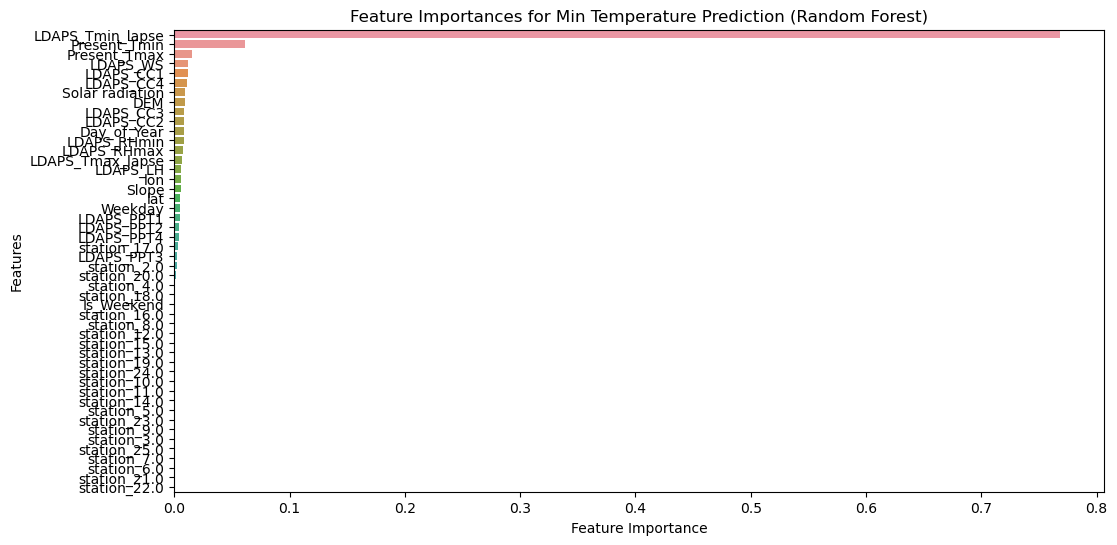

In [11]:
# Featuring Importance Analysis
feature_importances_rf = rf_model_min_temp.feature_importances_
sorted_idx = np.argsort(feature_importances_rf)[::-1]

# Printing feature importances
print("Feature Importances:")
for i, idx in enumerate(sorted_idx):
    print(f"{i + 1}. {X.columns[idx]}: {feature_importances_rf[idx]}")

# Plotting feature importances
plt.figure(figsize=(12, 6))
sns.barplot(x=feature_importances_rf[sorted_idx], y=X.columns[sorted_idx])
plt.title("Feature Importances for Min Temperature Prediction (Random Forest)")
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.show()


# Step 5: Model Building and Training for Maximum Temperature Prediction

In [12]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import GridSearchCV

# Model Building and Training for Maximum Temperature Prediction

# Creating a Random Forest Regressor
rf_model_max_temp = RandomForestRegressor(random_state=42)

# Training the model on the training set
rf_model_max_temp.fit(X_train_max_temp, y_train_max_temp)

# Evaluating the Model

# Making predictions on the testing set
y_pred_max_temp = rf_model_max_temp.predict(X_test_max_temp)

# Calculating evaluation metrics
mae_max_temp = mean_absolute_error(y_test_max_temp, y_pred_max_temp)
mse_max_temp = mean_squared_error(y_test_max_temp, y_pred_max_temp)
rmse_max_temp = np.sqrt(mse_max_temp)

print("Mean Absolute Error (MAE) for Max Temperature Prediction:", mae_max_temp)
print("Mean Squared Error (MSE) for Max Temperature Prediction:", mse_max_temp)
print("Root Mean Squared Error (RMSE) for Max Temperature Prediction:", rmse_max_temp)


Mean Absolute Error (MAE) for Max Temperature Prediction: 0.6841982908445554
Mean Squared Error (MSE) for Max Temperature Prediction: 0.8460393852229795
Root Mean Squared Error (RMSE) for Max Temperature Prediction: 0.9198039928283522


In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

# Linear Regression for Max Temperature Prediction

# Creating a Linear Regression model
linear_model_max_temp = LinearRegression()

# Training the model on the training set
linear_model_max_temp.fit(X_train_max_temp, y_train_max_temp)

# Making predictions on the testing set
y_pred_linear_max_temp = linear_model_max_temp.predict(X_test_max_temp)

# Calculating evaluation metrics for Linear Regression
mae_linear_max_temp = mean_absolute_error(y_test_max_temp, y_pred_linear_max_temp)
mse_linear_max_temp = mean_squared_error(y_test_max_temp, y_pred_linear_max_temp)
rmse_linear_max_temp = np.sqrt(mse_linear_max_temp)

print("\nLinear Regression Metrics for Max Temperature Prediction:")
print("Mean Absolute Error (MAE):", mae_linear_max_temp)
print("Mean Squared Error (MSE):", mse_linear_max_temp)
print("Root Mean Squared Error (RMSE):", rmse_linear_max_temp)

# Decision Tree Regression for Max Temperature Prediction

# Creating a Decision Tree Regressor model
dt_model_max_temp = DecisionTreeRegressor(random_state=42)

# Training the model on the training set
dt_model_max_temp.fit(X_train_max_temp, y_train_max_temp)

# Making predictions on the testing set
y_pred_dt_max_temp = dt_model_max_temp.predict(X_test_max_temp)

# Calculating evaluation metrics for Decision Tree Regression
mae_dt_max_temp = mean_absolute_error(y_test_max_temp, y_pred_dt_max_temp)
mse_dt_max_temp = mean_squared_error(y_test_max_temp, y_pred_dt_max_temp)
rmse_dt_max_temp = np.sqrt(mse_dt_max_temp)

print("\nDecision Tree Regression Metrics for Max Temperature Prediction:")
print("Mean Absolute Error (MAE):", mae_dt_max_temp)
print("Mean Squared Error (MSE):", mse_dt_max_temp)
print("Root Mean Squared Error (RMSE):", rmse_dt_max_temp)



Linear Regression Metrics for Max Temperature Prediction:
Mean Absolute Error (MAE): 1.0739919463508425
Mean Squared Error (MSE): 2.099580089598816
Root Mean Squared Error (RMSE): 1.448992784522689

Decision Tree Regression Metrics for Max Temperature Prediction:
Mean Absolute Error (MAE): 1.0147579914396074
Mean Squared Error (MSE): 2.0342542419552476
Root Mean Squared Error (RMSE): 1.4262728497574535


In [14]:
# Defining tolerance for accuracy calculation
tolerance = 1.0

# Calculating accuracy percentage for Random Forest Regression
accuracy_rf_max_temp = np.mean(np.abs(y_test_max_temp - y_pred_max_temp) <= tolerance) * 100
print(f"Accuracy Percentage (Random Forest Regression): {accuracy_rf_max_temp:.2f}%")

# Calculating accuracy percentage for Linear Regression
accuracy_linear_max_temp = np.mean(np.abs(y_test_max_temp - y_pred_linear_max_temp) <= tolerance) * 100
print(f"Accuracy Percentage (Linear Regression): {accuracy_linear_max_temp:.2f}%")

# Calculating accuracy percentage for Decision Tree Regression
accuracy_dt_max_temp = np.mean(np.abs(y_test_max_temp - y_pred_dt_max_temp) <= tolerance) * 100
print(f"Accuracy Percentage (Decision Tree Regression): {accuracy_dt_max_temp:.2f}%")


Accuracy Percentage (Random Forest Regression): 76.90%
Accuracy Percentage (Linear Regression): 58.39%
Accuracy Percentage (Decision Tree Regression): 65.16%


**Observations and Interpretation:**

The accuracy percentage, calculated based on a tolerance of ±1 degree Celsius, provides a measure of how well the predictions fall within an acceptable range.
Random Forest Regression shows the highest accuracy percentage among the three models, indicating that a significant portion of its predictions falls within the specified tolerance.
Linear Regression has a lower accuracy percentage, suggesting that its predictions are less aligned with the acceptable range compared to Random Forest Regression.
Decision Tree Regression falls in between with a moderate accuracy percentage.

# Plotting Actual vs Predicted values for Min Temperature Prediction

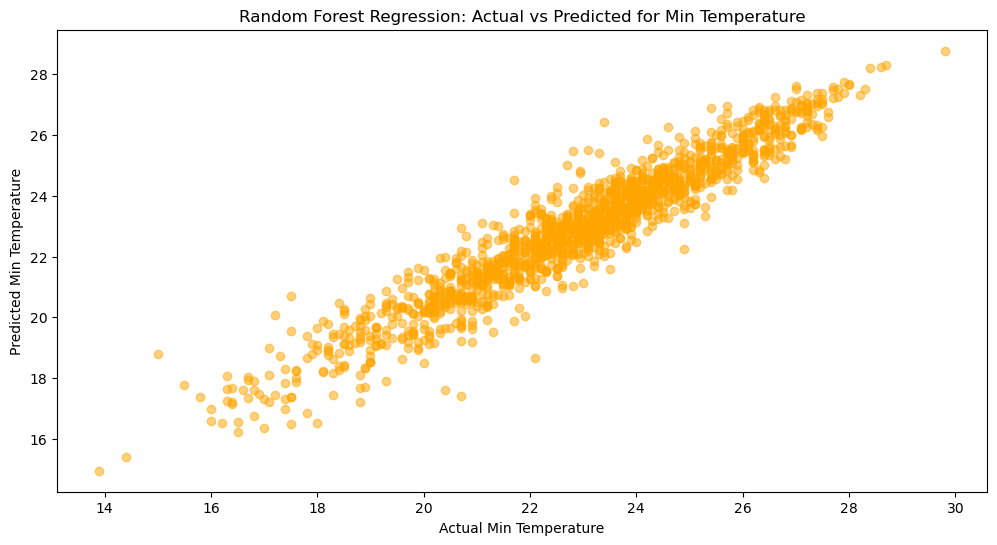

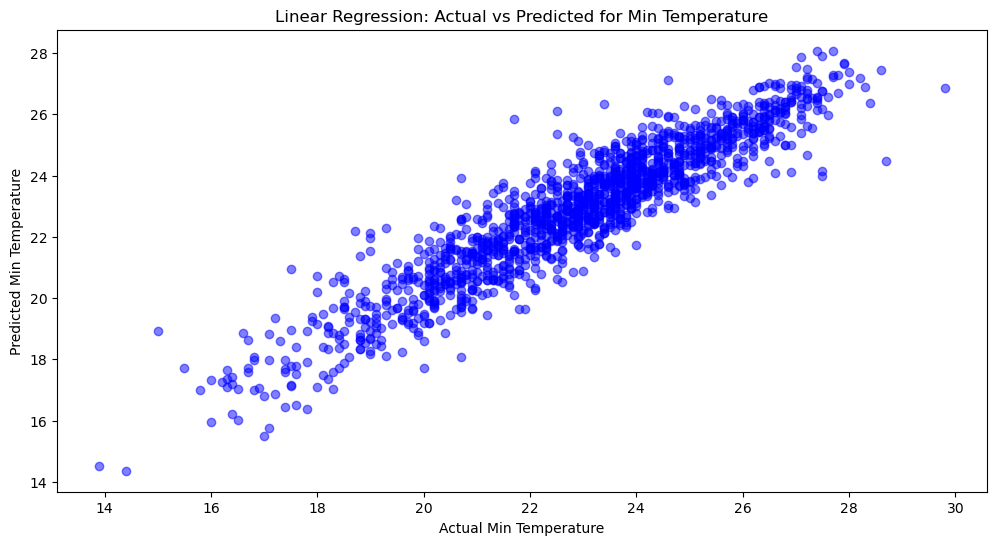

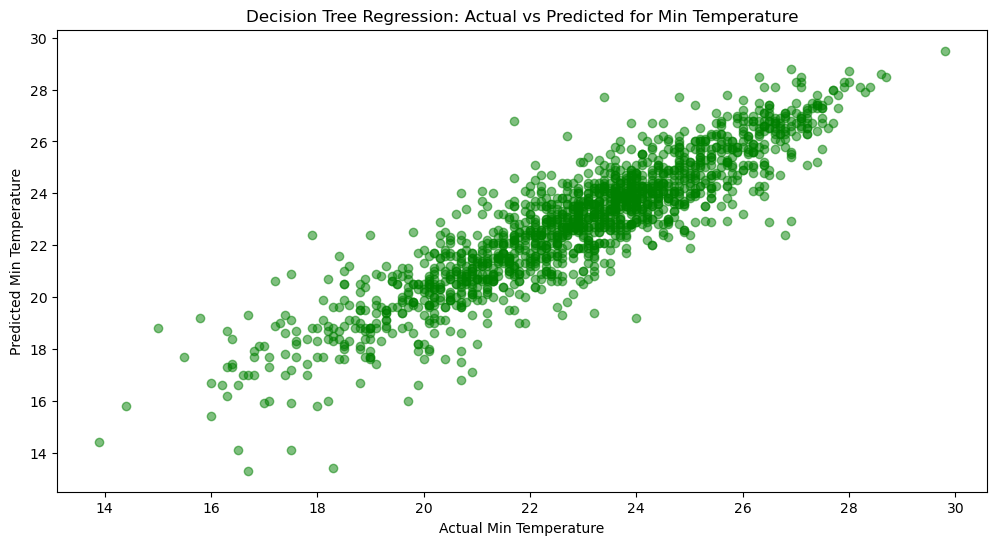

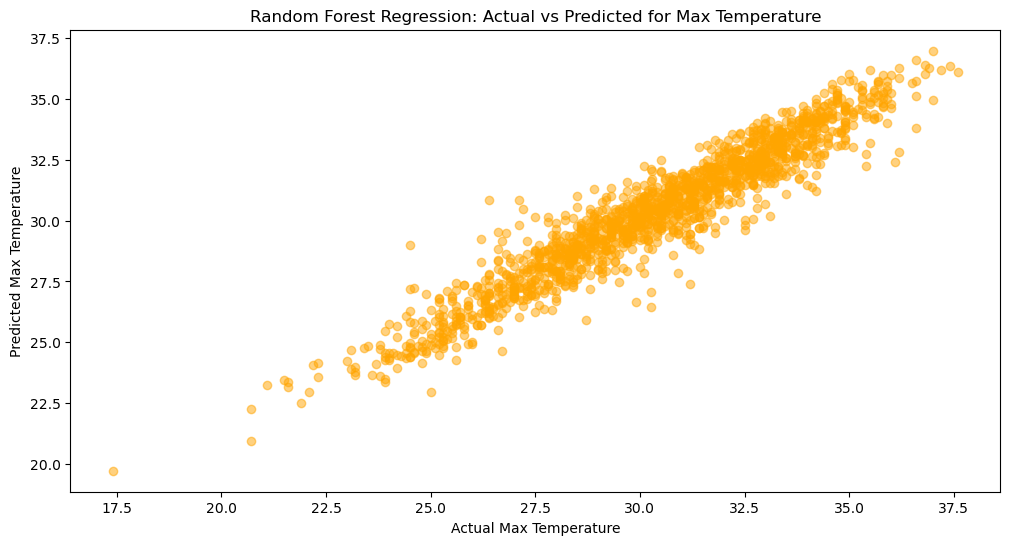

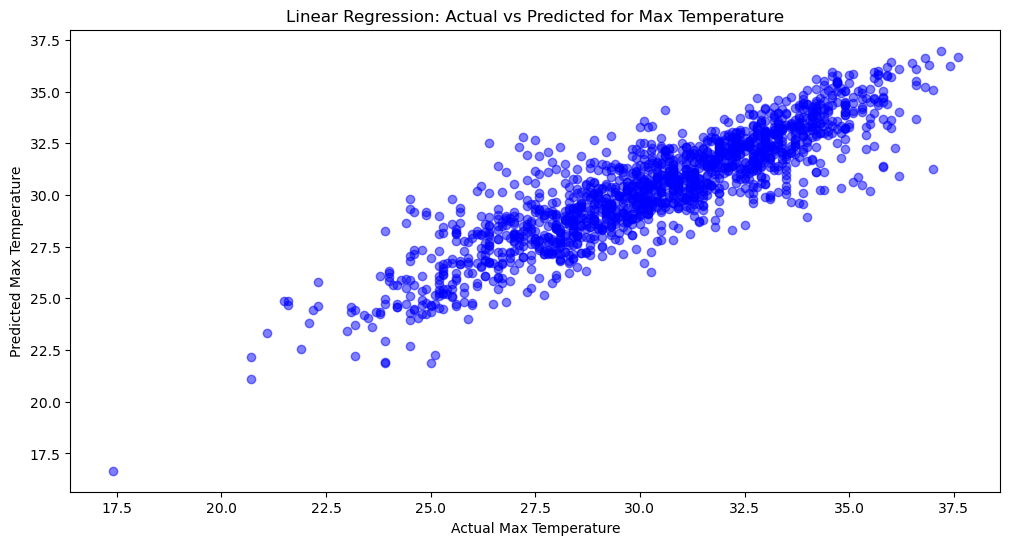

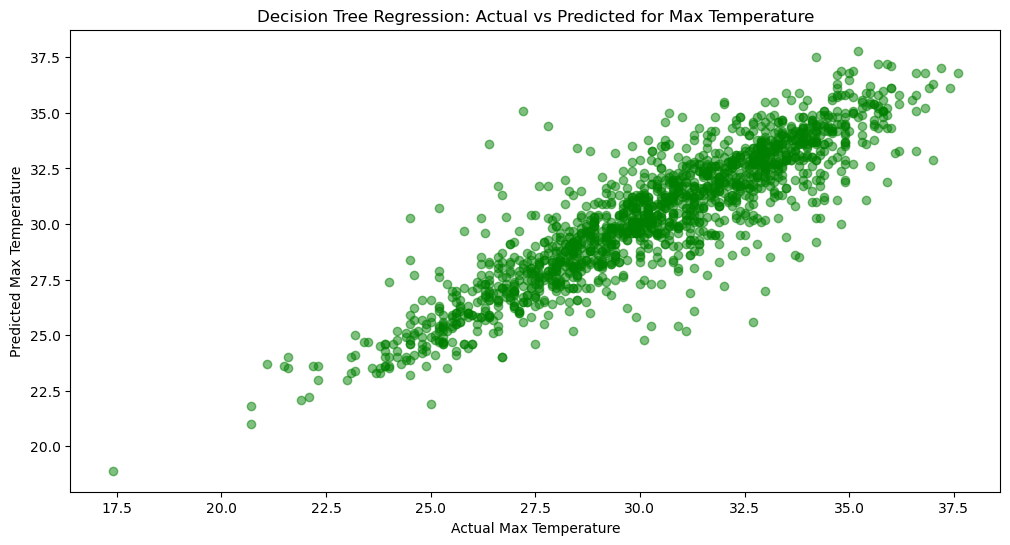

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting Actual vs Predicted values for Min Temperature Prediction

# Plotting for Random Forest Regression
plt.figure(figsize=(12, 6))
plt.scatter(y_test_min_temp, y_pred_min_temp, color='orange', alpha=0.5)
plt.title("Random Forest Regression: Actual vs Predicted for Min Temperature")
plt.xlabel("Actual Min Temperature")
plt.ylabel("Predicted Min Temperature")
plt.show()

# Plotting for Linear Regression
plt.figure(figsize=(12, 6))
plt.scatter(y_test_min_temp, y_pred_linear_min_temp, color='blue', alpha=0.5)
plt.title("Linear Regression: Actual vs Predicted for Min Temperature")
plt.xlabel("Actual Min Temperature")
plt.ylabel("Predicted Min Temperature")
plt.show()

# Plotting for Decision Tree Regression
plt.figure(figsize=(12, 6))
plt.scatter(y_test_min_temp, y_pred_dt_min_temp, color='green', alpha=0.5)
plt.title("Decision Tree Regression: Actual vs Predicted for Min Temperature")
plt.xlabel("Actual Min Temperature")
plt.ylabel("Predicted Min Temperature")
plt.show()

# Plotting Actual vs Predicted values for Max Temperature Prediction

# Plotting for Random Forest Regression
plt.figure(figsize=(12, 6))
plt.scatter(y_test_max_temp, y_pred_max_temp, color='orange', alpha=0.5)
plt.title("Random Forest Regression: Actual vs Predicted for Max Temperature")
plt.xlabel("Actual Max Temperature")
plt.ylabel("Predicted Max Temperature")
plt.show()

# Plotting for Linear Regression
plt.figure(figsize=(12, 6))
plt.scatter(y_test_max_temp, y_pred_linear_max_temp, color='blue', alpha=0.5)
plt.title("Linear Regression: Actual vs Predicted for Max Temperature")
plt.xlabel("Actual Max Temperature")
plt.ylabel("Predicted Max Temperature")
plt.show()

# Plotting for Decision Tree Regression
plt.figure(figsize=(12, 6))
plt.scatter(y_test_max_temp, y_pred_dt_max_temp, color='green', alpha=0.5)
plt.title("Decision Tree Regression: Actual vs Predicted for Max Temperature")
plt.xlabel("Actual Max Temperature")
plt.ylabel("Predicted Max Temperature")
plt.show()


# Feature Importance Analysis for Max Temperature Prediction

Feature Importances for Max Temperature Prediction:
1. LDAPS_Tmax_lapse: 0.6823419887225333
2. Present_Tmax: 0.04872415294044411
3. LDAPS_CC1: 0.030421232405759294
4. LDAPS_CC3: 0.023569533723603424
5. LDAPS_WS: 0.022567215022146314
6. LDAPS_CC4: 0.020647277572060252
7. Day_of_Year: 0.019424156739029218
8. Present_Tmin: 0.01719588221287994
9. Solar radiation: 0.016205563498648688
10. LDAPS_Tmin_lapse: 0.014974299800124307
11. LDAPS_CC2: 0.01252812957256852
12. LDAPS_LH: 0.012225193190658342
13. LDAPS_RHmin: 0.01127416522257429
14. LDAPS_RHmax: 0.009959478352487894
15. LDAPS_PPT2: 0.009347999899019716
16. DEM: 0.007922406167838453
17. Weekday: 0.006613526439219739
18. LDAPS_PPT3: 0.006376939784843948
19. LDAPS_PPT1: 0.005852965570889713
20. lon: 0.005115513469535583
21. LDAPS_PPT4: 0.004102682924279626
22. lat: 0.0031581999752823896
23. Slope: 0.0026733964776949237
24. station_18.0: 0.0018765263043406474
25. Is_Weekend: 0.000807406774645812
26. station_20.0: 0.0008034086148014401
27. st

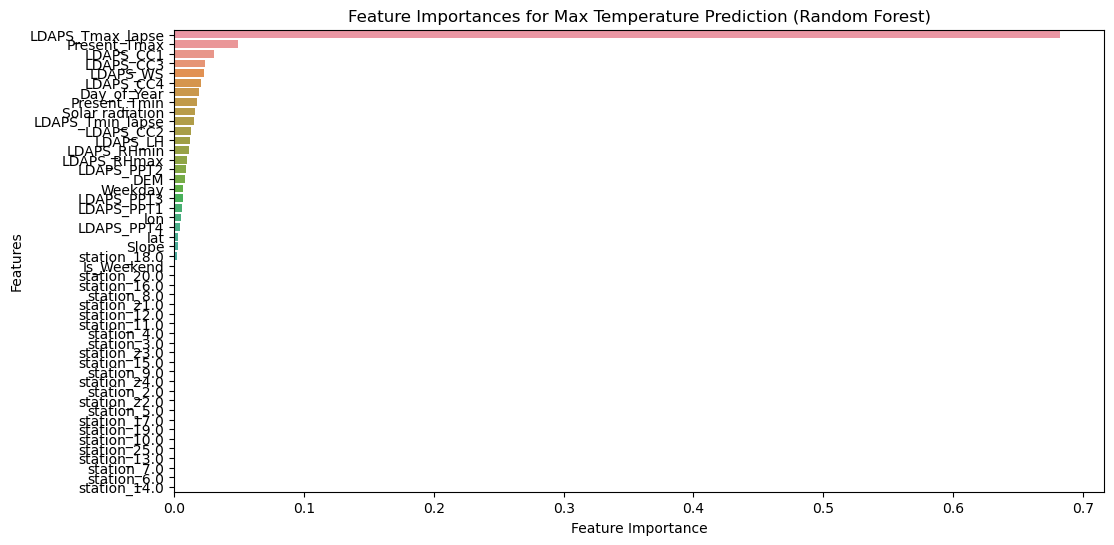

In [16]:
# Feature Importance Analysis for Max Temperature Prediction
feature_importances_rf_max_temp = rf_model_max_temp.feature_importances_
sorted_idx_max_temp = np.argsort(feature_importances_rf_max_temp)[::-1]

# Printing feature importances
print("Feature Importances for Max Temperature Prediction:")
for i, idx in enumerate(sorted_idx_max_temp):
    print(f"{i + 1}. {X.columns[idx]}: {feature_importances_rf_max_temp[idx]}")

# Plotting feature importances
plt.figure(figsize=(12, 6))
sns.barplot(x=feature_importances_rf_max_temp[sorted_idx_max_temp], y=X.columns[sorted_idx_max_temp])
plt.title("Feature Importances for Max Temperature Prediction (Random Forest)")
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.show()
